
# レストランのチップ額予測

## scikit-learn
<img src="https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/logos/scikit-learn-logo.png">

- 前回のコースでは、LLM（大規模言語モデル）の基礎について学びました。
LLMとは何か、どのような構造を持つのか、そしてテキストがどのように処理・生成されるのかを、PhiモデルとHugging Faceのライブラリを使いながら実際に体験しました。また、TokenizerやAttention機構など、モデル内部の重要な仕組みについても紹介しました。
- 今回のコースでは、**scikit-learn ライブラリ**を使って、データの前処理と数値の予測を行う「回帰モデル」の作成に取り組んでみましょう！

### **Scikit-learnとは**

- Scikit-learnはNumPyやSciPyといった数値演算、数値解析ライブラリと組み合わせて使うことが出来る機械学習ライブラリです。
- Scikit-learnはSVMやRandomForest、Gradient Boosting、k-NN、DBSCANといった非常に多くの機械学習アルゴリズムに対応しており、それらを使って分類、回帰、クラスタリングといった様々な機械学習を行うことが可能です。

### **Scikit-learnを使うメリット**
- 一貫性: Scikit-learnのすべてのクラスは、共通のメソッドを持っています。これにより、学習コストを抑えることが可能です。
- 豊富な機能: 分類、回帰、クラスタリング、次元削減、モデル選択など、非常に多くの機械学習タスクをサポートしています。
- 高度なドキュメンテーション: Scikit-learnの公式ウェブサイトには、各モデルの詳細な説明や、どのように実装すればよいかの具体的なガイドラインがあります。
- 効率性: Scikit-learnは、PythonのNumPyとSciPyという2つの強力なライブラリを基盤としています。これらのライブラリは高度に最適化されており、数学的な計算を効率的に行うことができます。
- 柔軟性: Scikit-learnは、プリプロセッシング、特徴選択、特徴抽出など、機械学習ワークフローの各ステップに役立つツールを提供します。
- コミュニティ: Scikit-learnは世界中のコミュニティに支持されており、新しい機能の開発や問題の解決が頻繁に行われています。

## 参考サイト
### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

## **はじめてみよう**
- Pandasはデータサイエンティストや機械学習エンジニアが日々の仕事でよく利用するツールであり、Pythonでデータ分析を行う際には必須のライブラリとなっています。
- Scikit-learnは機械学習を扱うデータサイエンティストや研究者にとって、強力で信頼性の高いツールとなっています。
- 今回のコースでは**PandasとScikit-learn**を使った機械学習について学んでいきましょう！

### ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install japanize_matplotlib

### **Google Drive をマウントする手順**

- 「Google Drive に接続」をクリック

- アカウントを選択

- ログイン（認証）を実行

- 「許可」または「Continue（続行）」をクリック

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**パスを指定**

左側のナビゲーションメニューにある「ファイル📁マーク」をクリックし、「drive」を選択します。次に、「DS_course2」フォルダを探し、その上にカーソルを合わせて、右側に表示される「︙（3つのドット）」をクリックします。 表示されるメニューから「パスをコピー」を選び、コピーしたパスを 以下のコードに貼り付けて使用してください。

📌 パスはこのような形になるのが理想です： os.chdir('/content/drive/MyDrive/MyFolder/…/DS_course2'）

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('コピーしたパス')

### ライブラリのimport

In [ ]:
import numpy as np # 数値演算ライブラリ
import pandas as pd # データ分析ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # 可視化ライブラリ
from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import linear_model # scikit-learnのlinear_modelライブラリ
from sklearn.ensemble import RandomForestRegressor  # RandomForestRegressor (回帰モデル)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 回帰モデルの性能評価用関数

### 定数の定義
- データファイルパスを定義しておきましょう！
- データ読み込みの際に使用してください。

In [ ]:
# データファイルパス定義
TIPS_CSV = "./data/tips_customized.csv"

### レストランのチップ額のデータセットを読み込みます

In [ ]:
# データセットを読み込み
df_tips = pd.read_csv(TIPS_CSV, index_col=0) # 0番の列をindexに使用するため、index_col=0を指定します

### **読み込んだDataFrameを確認しましょう**

#### 先頭５行のデータをざっと眺めます

In [ ]:
df_tips.head()

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01
1,10.34,Male,No,Sun,Dinner,3,1.66
2,21.01,Male,No,Sun,Dinner,3,3.50
3,23.68,Male,No,Sun,Dinner,2,3.31
4,24.59,Female,No,Sun,Dinner,4,3.61


- DataFrameにはMale/Femaleなどの文字列が含まれていることがわかります。

| カラム名 | 内容 |
| --- | --- |
| total_bill | 総支払額(食事代、税込み)　(USドル) |
| sex | 性別 |
| smoker | 喫煙者か否か |
| day | 曜日 |
| time | 食事の時間 |
| size | 人数 |

- 次に「sex」列に含まれるカテゴリ（Male・Female）の出現回数を集計しています。

In [ ]:
df_tips['sex'].value_counts()

,count
sex,
Male,157
Female,87


- smoker」列に含まれるカテゴリの出現回数も集計しています。喫煙者かどうかも２値のみです。

In [ ]:
df_tips['smoker'].value_counts()

,count
smoker,
No,146
Yes,88


- day列には曜日が入っていることがわかります。ただし、木曜日、金曜日、土曜日、日曜日のみが入っています（月曜日～水曜日は存在しません）

In [ ]:
df_tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


- time列を確認すると、特に「dinner」が多いことがわかります。

In [ ]:
df_tips['time'].value_counts()

,count
time,
Dinner,176
Lunch,68


##### **カテゴリカル変数**
- 特定のグループまたは名目上のカテゴリに、いくつかの質的特性に基づいて値を割り当てた変数のことをカテゴリカル変数と言います（質的変数とも言います）。
- 上記のsex, smoker, dayはそれぞれカテゴリカル変数と言えます。
- SVRやRandomForestRegressorのような回帰モデルにカテゴリ変数を指定するとエラーが発生するので対策が必要です。

### **行数、列数、データ型、欠損値の確認**

In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    object 
 2   smoker      234 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
 6   tip         244 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


- smoker の変数が欠損していることがわかります

##### **欠損値**
- データセット内のある変数がなんらかの理由によりデータが欠落しているものを刺します。
- 例えばアンケート調査で無回答だった場合や、センサーデータで取得に失敗したデータなどが該当します。
- モデルに欠損値が含まれたデータを指定するとエラーが発生するため、対策が必要です。

### **基本統計量を確認します**

In [ ]:
df_tips.describe()

,total_bill,size,tip
count,244.000000,244.000000,244.000000
mean,19.785943,2.569672,2.998279
std,8.902412,0.951100,1.383638
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.000000,2.900000
75%,24.127500,3.000000,3.562500
max,50.810000,6.000000,10.000000


- total_billおよびtipでは、75%タイルからmax値に大きな開きが発生しており、外れ値か、べき分布のデータであることが考えられます。

### 欠損値の対策

In [ ]:
# 欠損値の数を確認
# isnull()という関数を使用して欠損値かどうかを取得し、sum()関数を用いて集計することが可能です
df_tips.isnull().sum()

,0
total_bill,0
sex,0
smoker,10
day,0
time,0
size,0
tip,0


- smoker 列に10件のみ存在するようです。
- 量としては多くないので、そのまま削除しても良さそうです。

In [ ]:
# 欠損値を持つ行を確認
# any()関数を用いると欠損行を抽出できます
df_tips[df_tips.isnull().any(axis=1)]

,total_bill,sex,smoker,day,time,size,tip
9,14.78,Male,NaN,Sun,Dinner,2,3.23
40,16.04,Male,NaN,Sat,Dinner,3,2.24
106,20.49,Male,NaN,Sat,Dinner,2,4.06
140,17.47,Female,NaN,Thur,Lunch,2,3.50
153,24.55,Male,NaN,Sun,Dinner,4,2.00
171,15.81,Male,NaN,Sat,Dinner,2,3.16
174,16.82,Male,NaN,Sun,Dinner,2,4.00
186,20.90,Female,NaN,Sun,Dinner,3,3.50
215,12.90,Female,NaN,Sat,Dinner,2,1.10
242,17.82,Male,NaN,Sat,Dinner,2,1.75


- 目的変数であるtip値を確認。2σ以上の値になっていないため、削除しても影響は少なめと思われます。
- Dinnerが多いですが、元々Dinnerの方が多めのため、それほど影響は無さそうです。

In [ ]:
# 欠損値の削除
# dropna()メソッドを使用して欠損値を削除する
df_tips2 = df_tips.dropna(how='any')  # how='any'は全ての列のうちどれか１つでも欠損値を含む行を対象とすることを指定しています
df_tips2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  234 non-null    float64
 1   sex         234 non-null    object 
 2   smoker      234 non-null    object 
 3   day         234 non-null    object 
 4   time        234 non-null    object 
 5   size        234 non-null    int64  
 6   tip         234 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ KB


- 欠損値は削除しました。

💡　削除する以外の方法としては、欠損値を予測するモデルを作り、値を埋めて活かす方法も存在します。

### **カテゴリカル変数の対策**

In [ ]:
categories = ['sex','smoker','day','time']  # カテゴリカル変数の対象とする列を指定する

df_tips3 = df_tips2.copy()  # DataFrameを書き換えるため、変換する
for category in categories:
    label_encoder = LabelEncoder()  # 文字列を数値に変換するクラスのインスタンスを作成
    label_encoder = label_encoder.fit(df_tips3[category])  # fit関数で文字列と数値の関係を取得
    df_tips3[category] = label_encoder.transform(df_tips3[category])  # transformで変換を実行
    df_tips3[category] = df_tips3[category].astype('category') # カテゴリカル変数には専用の型'category'があるため、型変換しておく
    print(df_tips3[category].value_counts())  # 変換後の値を表示

df_tips3.info()  # 型を表示

sex
1    150
0     84
Name: count, dtype: int64
smoker
0    146
1     88
Name: count, dtype: int64
day
1    82
2    72
3    61
0    19
Name: count, dtype: int64
time
0    167
1     67
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  234 non-null    float64 
 1   sex         234 non-null    category
 2   smoker      234 non-null    category
 3   day         234 non-null    category
 4   time        234 non-null    category
 5   size        234 non-null    int64   
 6   tip         234 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 8.8 KB


- object型（文字列）が無くなり、categoryになりました。

###**相関係数を表示してみましょう**

「total_bill」「size」「tip」の数値同士の相関関係をヒートマップで可視化しています。

カテゴリ変数は除外しています。

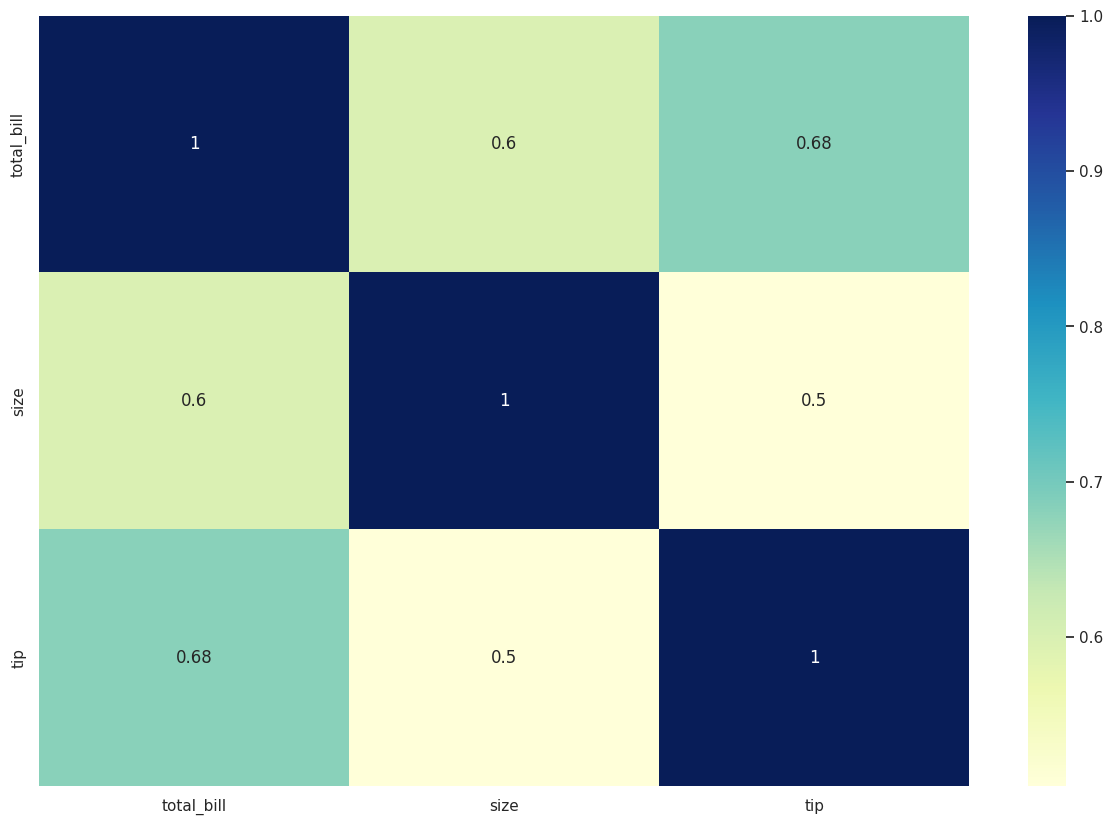

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_tips3.loc[:,['total_bill','size','tip']].corr(), annot=True, cmap="YlGnBu") # カテゴリカル変数は除いて表示
plt.show()

### 考察
- ある程度強い相関はあるものの、かなり強い相関とまでは言えないぐらいの相関です。
- total_billにtipが影響するのも理解できますし、size(人数)がtotal_billに影響するのも理解できるため、ある程度納得の行く結果と言えます。

### **回帰モデルを作ってみましょう**　(LinearRegression)

ここからは、scikit-learn（sklearn）を使って実装していきます。

In [ ]:
# 説明変数と目的変数に分ける
X = df_tips3.iloc[:,:-1]
y = df_tips3.iloc[:,-1]

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# LinearRegressionで学習させる
ln_model = linear_model.LinearRegression()    # 回帰モデルを作る
ln_model.fit(X_train, y_train)    # 訓練する

LinearRegression()

### サンプルプログラム1-7　エラーレートと決定係数によるモデルの評価(LinearRegression)

- 各種エラーレートと決定係数の数式は以下の通りです
### Mean Absolute Error (MAE)
$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

### Mean Squared Error (MSE)
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

### Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

### 決定係数 (R^2)
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

ここで、

- $n$ はサンプル数
- $y_i$ は実際の値
- $\hat{y}_i$ は予測値
- $\bar{y}$ は $y$ の平均値

です。


In [ ]:
# エラーレートと決定係数の算出を行うユーザー定義関数
def evaluate_metrics(y_train_pred, y_test_pred):
    # 学習時スコア
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    train_MSE = mean_squared_error(y_train, y_train_pred)
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_R2 = r2_score(y_train, y_train_pred)

    # テスト時スコア
    test_MAE = mean_absolute_error(y_test, y_test_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_R2 = r2_score(y_test, y_test_pred)

    print("学習時スコア(train score)")
    print("　平均絶対誤差: ", train_MAE)
    print("　平均二乗誤差: ", train_MSE)
    print("　二乗平均平方根誤差: ", train_RMSE)
    print("　決定係数R^2: ", train_R2)

    print("テストスコア(test score)")
    print("　平均絶対誤差: ", test_MAE)
    print("　平均二乗誤差: ", test_MSE)
    print("　二乗平均平方根誤差: ", test_RMSE)
    print("　決定係数R^2: ", test_R2)

In [ ]:
y_train_pred = ln_model.predict(X_train)  # 学習データを使って推論する
y_test_pred = ln_model.predict(X_test)  # テストデータを使って推論する

evaluate_metrics(y_train_pred, y_test_pred)

学習時スコア(train score)
　平均絶対誤差:  0.7319052569583733
　平均二乗誤差:  1.0623727913527168
　二乗平均平方根誤差:  1.0307146992998193
　決定係数R^2:  0.4780470886453463
テストスコア(test score)
　平均絶対誤差:  0.737690402435345
　平均二乗誤差:  0.9399580751937852
　二乗平均平方根誤差:  0.9695143501742433
　決定係数R^2:  0.4567211581365074


### **残差を可視化してモデルを評価してみましょう！**
- 残差とは実際の値と回帰モデルによる予測値との差のことです。
- ここではX軸を実際の値、y軸を予測値とし、残差0の直線を引いてどの程度実際の値と予測値でズレがあるのかを可視化します。

In [ ]:
# 残差の可視化を行うユーザー定義関数
def residual_plot(y_train_pred, y_test_pred):
    df_train = pd.DataFrame(y_train)
    df_train['y_train_pred'] = y_train_pred

    df_test = pd.DataFrame(y_test)
    df_test['y_test_pred'] = y_test_pred

    ax = plt.gca()

    # 傾き1の直線を追加
    a_line=[min(df_train['tip'].min(), df_test['tip'].min()), max(df_train['tip'].max(), df_test['tip'].max())]
    sns.regplot(x=df_train['tip'], y=df_train['y_train_pred'],label='train')
    sns.regplot(x=df_test['tip'], y=df_test['y_test_pred'],label='test')
    sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1},label='residual 0')

    ax.set_xlabel('true')
    ax.set_ylabel('pred')

    plt.legend(fontsize=10)
    plt.show()

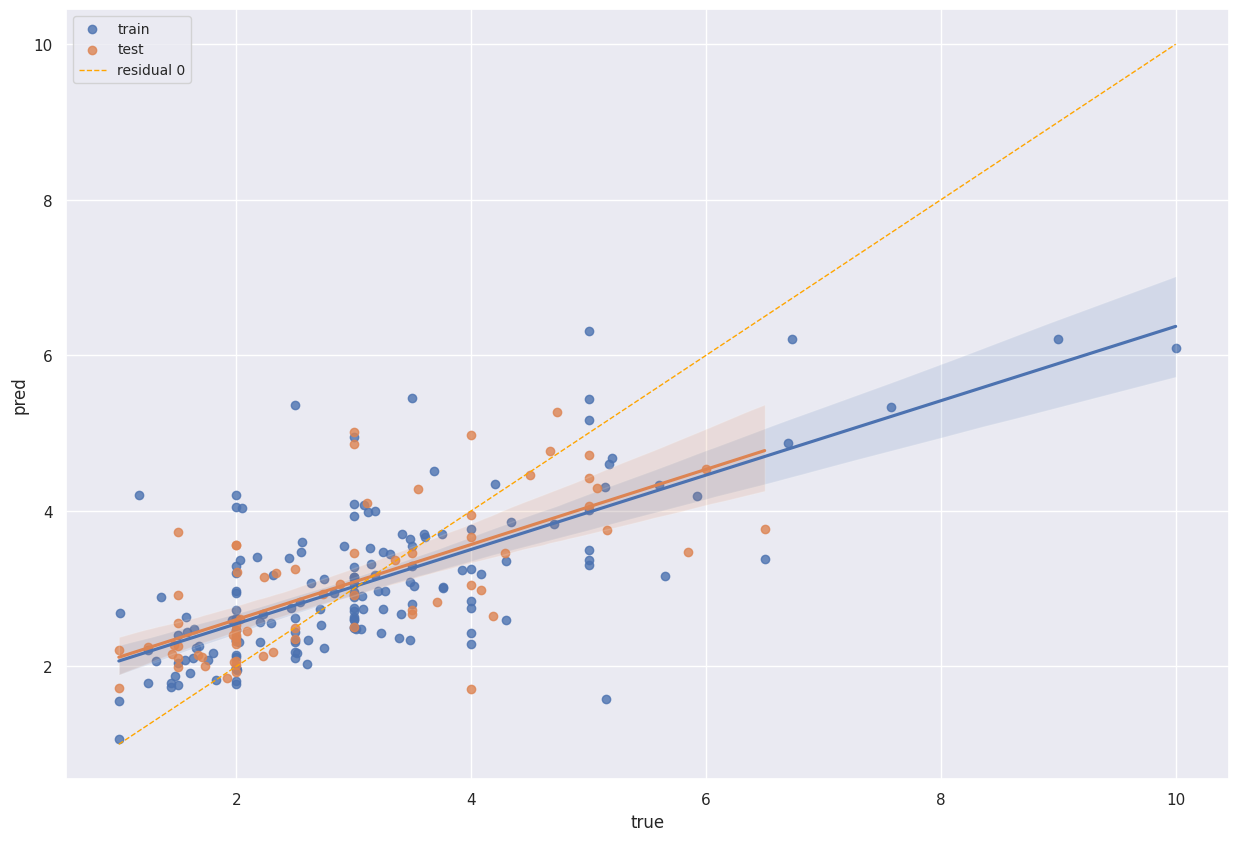

In [ ]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot(y_train_pred, y_test_pred)

### 考察
- tip値の大きな学習データが疎らに分布しており、わずかなデータ量の増減によって大きく影響が出そうです。
  - \\$10 や \\$9 の学習データは比較的残差０の直線に近いが、\\$6～\\$7.5あたりの残差が大きく、データ量不足が伺えます。
  - この差はデータ量を増やさないと難しいように思います。
- 学習とテストではあまり差異が発生していません。
  - テストの残差は学習時と同様の傾向となっており、それほど過学習はしていないように見えます。

### **別の回帰モデルを試してみましょう！**　(RandomForestRegressor)

In [ ]:
# 学習する
rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

### エラーレートと決定係数を使ってモデルを評価します

In [ ]:
y_train_pred = rf_model.predict(X_train)  # 学習データを使って推論する
y_test_pred = rf_model.predict(X_test)  # テストデータを使って推論する

evaluate_metrics(y_train_pred, y_test_pred)

学習時スコア(train score)
　平均絶対誤差:  0.6332288203813539
　平均二乗誤差:  0.730101229655156
　二乗平均平方根誤差:  0.8544596126530241
　決定係数R^2:  0.6412949714978158
テストスコア(test score)
　平均絶対誤差:  0.6726750548139903
　平均二乗誤差:  0.8428833533116792
　二乗平均平方根誤差:  0.9180867896401076
　決定係数R^2:  0.5128285993832442


### 考察
- エラーレート（MAE、MSE、RMSE）は概ね学習時の方が低く、テスト時の方が高いため過学習は起きていないように見えます。
- 決定係数は学習時のほうが高い点も同様です。
- 事前に調べた相関係数と比べても決定係数が高め。データは多くない状況のため、少しデータが変わっただけでも大きく変動しそうです。
  - たまたま学習データとテストデータの分布が似ていた可能性も高いです。

### **今回も残差を可視化してモデルを評価してみましょう！**

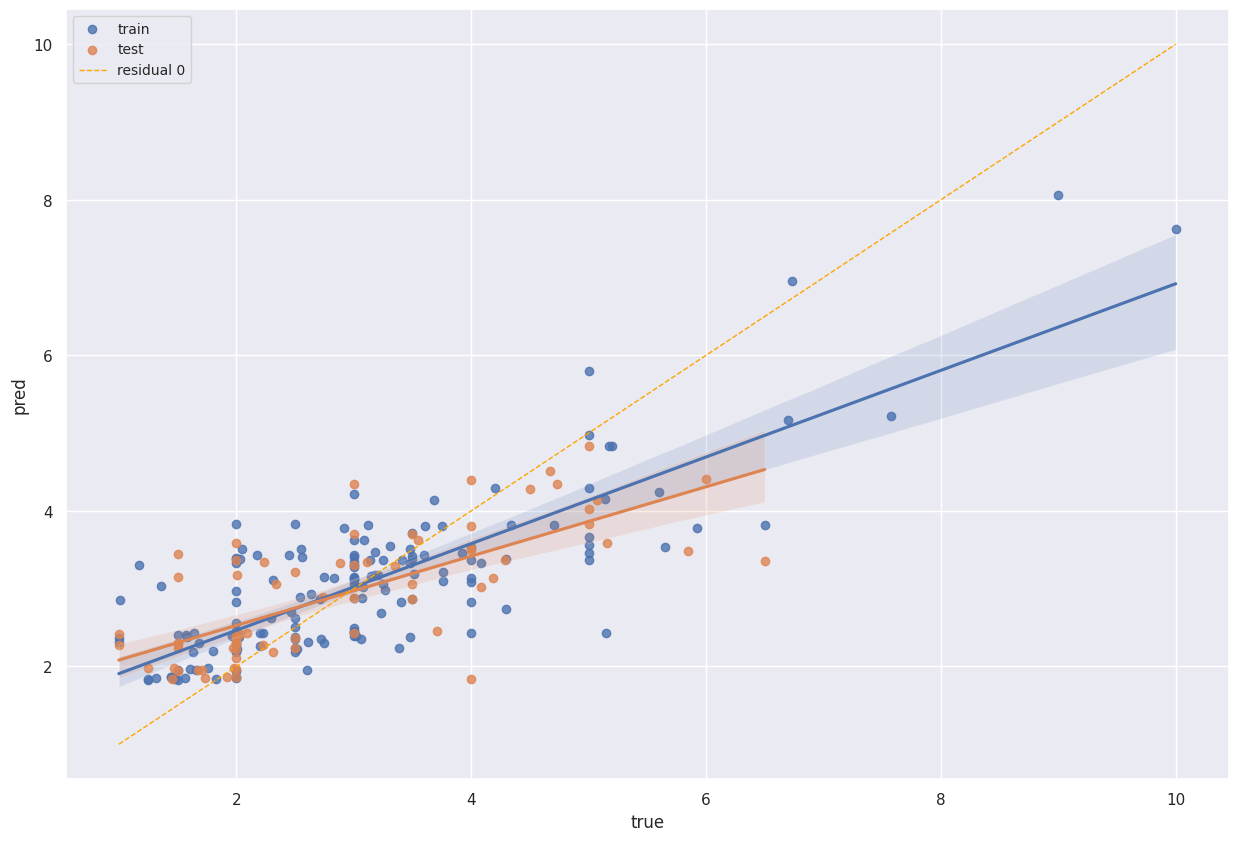

In [ ]:
# 残差の可視化を行うユーザー定義関数を呼び出す
residual_plot(y_train_pred, y_test_pred)

### 考察
- RandomForestRegressor では、学習時とテスト時で精度の落ち幅がすこし大きくなっています
  - データが足りない中でも比較的良好なモデルが作成できているようにも思えます。

---
---
---
---
---